<a href="https://colab.research.google.com/github/kakiang/Hamoye-projects/blob/master/Hamoye_stage_D_MNIST_Keras_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks, Image Recognition

## Introduction to Keras and Tensorflow with Python

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
sns.set_style("white")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
print(tf.__version__)

2.3.0


In [3]:
mnist = keras.datasets.mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [7]:
class_labels = np.unique(train_labels)
class_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
print(f'There are {len(class_labels)} classes in the dataset')
print(f'They are: {class_labels}')

There are 10 classes in the dataset
They are: [0 1 2 3 4 5 6 7 8 9]


### Looking at the digits

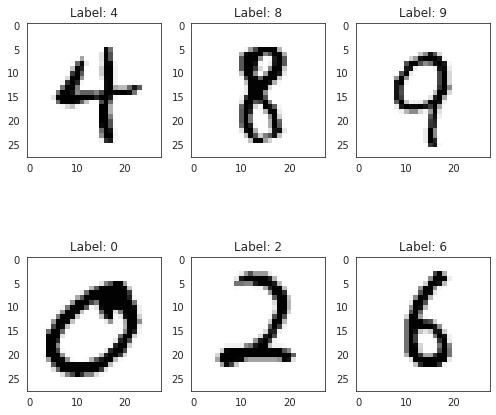

In [9]:
def show_image_sample():
  plt.figure(figsize=(7,7))
  for i in range(6):
    num = random.randint(0, len(train_images))
    plt.subplot(2,3,i+1)
    plt.imshow(train_images[num], cmap='Greys')
    plt.title('Label: {}'.format(train_labels[num]))
  plt.tight_layout()

show_image_sample()

### Processing the images

#### We scale our dataset to range between 0 and 1. In this dataset, the pixel values range from 0 to 255. Dividing the data by 255 normalizes pixel values using minmax (values between 0 and 1 inclusive)

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [11]:
# show_image_sample()

#### Reshape data from 28 x 28 array to a 784 1D  array

In [12]:
# reshape 28 x 28 matrices into 784-length vectors
new_dim = np.prod(train_images.shape[1:])
train_images = train_images.reshape(train_images.shape[0], new_dim)
test_images = test_images.reshape(test_images.shape[0], new_dim)

#### Split training data into training and validation data

In [13]:
x_val = train_images[0:5000]
x_train = train_images[5000:]

y_val = train_labels[0:5000]
y_train = train_labels[5000:]

print("x_train: {}" .format(x_train.shape))
print("y_train: {}" .format(y_train.shape))
print("x_val: {}" .format(x_val.shape))
print("y_val: {}" .format(y_val.shape))

x_train: (55000, 784)
y_train: (55000,)
x_val: (5000, 784)
y_val: (5000,)


#### Encode labels to one-hot categorical format
```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [14]:
from tensorflow.keras.utils import to_categorical

nb_classes = 10
y_train = to_categorical(y_train, nb_classes)
y_val = to_categorical(y_val, nb_classes)
y_test = to_categorical(test_labels, nb_classes)

In [15]:
x_train.size

43120000

## Building a Sequential Feed Forward Network in Keras

### Create the tf.keras.Sequential model by stacking layers

In [16]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
# An "activation" is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that artifical neuron has 
# fired. The Rectified Linear Unit (ReLU) converts all negative inputs to nodes in the 
# next layer to be zero. Those inputs are then not considered to be fired.
# Positive values of a node are unchanged. R(x)=max(0,x)
model.add(Dense(256, activation='relu', input_shape=(new_dim,)))
model.add(Dense(128, activation='relu'))
# The "softmax" activation represents a probability distribution over K different possible
# outcomes. Its values are all non-negative and sum to 1.
model.add(Dense(nb_classes, activation='softmax'))
# Summarize the built model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

In [17]:
# We use the Adam optimizer for learning 
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

### Train the model

In [18]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                    batch_size=1000, epochs=20, verbose=1)

Epoch 1/20
55/55 [==============================] - 1s 26ms/step - loss: 0.6388 - accuracy: 0.8303 - val_loss: 0.2510 - val_accuracy: 0.9284
Epoch 2/20
55/55 [==============================] - 1s 23ms/step - loss: 0.2213 - accuracy: 0.9370 - val_loss: 0.1741 - val_accuracy: 0.9536
Epoch 3/20
55/55 [==============================] - 1s 23ms/step - loss: 0.1592 - accuracy: 0.9550 - val_loss: 0.1385 - val_accuracy: 0.9626
Epoch 4/20
55/55 [==============================] - 1s 23ms/step - loss: 0.1254 - accuracy: 0.9639 - val_loss: 0.1217 - val_accuracy: 0.9658
Epoch 5/20
55/55 [==============================] - 1s 23ms/step - loss: 0.1013 - accuracy: 0.9710 - val_loss: 0.1040 - val_accuracy: 0.9706
Epoch 6/20
55/55 [==============================] - 1s 23ms/step - loss: 0.0834 - accuracy: 0.9762 - val_loss: 0.0940 - val_accuracy: 0.9740
Epoch 7/20
55/55 [==============================] - 1s 23ms/step - loss: 0.0701 - accuracy: 0.9799 - val_loss: 0.0861 - val_accuracy: 0.9766
Epoch 8/20
55

### Evaluate Model's Accuracy on Test Data

In [19]:
print("Evaluate on test data")
model.evaluate(test_images, y_test, verbose=2)
# print('Test loss:', test_loss)
# print('Test accuracy:', test_accuracy)

Evaluate on test data
313/313 - 0s - loss: 0.0752 - accuracy: 0.9782


[0.07523202896118164, 0.9782000184059143]

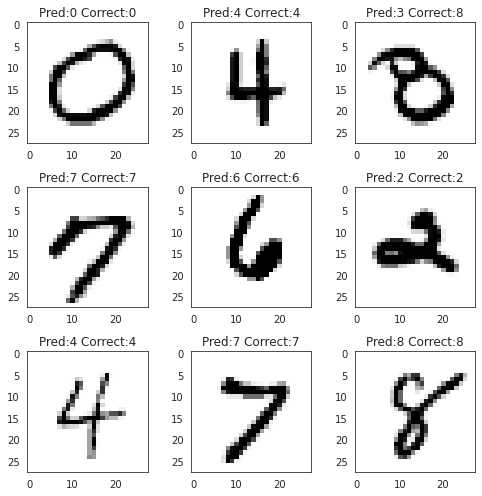

In [20]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict` 

# print("Generate predictions for 3 samples")
# predictions = model.predict(test_images[:3])
# print("predictions shape:", predictions.shape)
def test_random_predictions():
  plt.figure(figsize=(7,7))
  for i in range(9):
    plt.subplot(3,3,i+1)
    index = random.randint(0, len(test_images))
    plt.imshow(test_images[index].reshape(28, 28), cmap='Greys')
    pred = model.predict(test_images[index].reshape(1, new_dim))
    plt.title('Pred:{} Correct:{}'.format(pred.argmax(), y_test[index].argmax()))
  plt.tight_layout()

test_random_predictions()

### Plot Loss Curves to Check for Overfitting

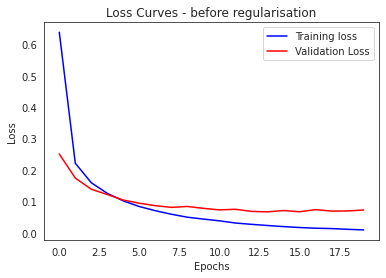

In [21]:
# plt.figure()
def plot_loss_curves(history):
  plt.plot(history.history['loss'], 'blue' )
  plt.plot(history.history['val_loss'], 'red' )
  plt.legend(['Training loss' , 'Validation Loss'])
  plt.xlabel('Epochs' )
  plt.ylabel('Loss' )
  plt.title('Loss Curves - before regularisation')

plot_loss_curves(history)

Although the validation and training loss seem great, we can see that the validation loss increases. This identifies overfitting in our network. How do we proceed?

In [22]:
from keras.layers import Dropout

regl_model = Sequential()
regl_model.add(Dense(256, activation='relu', input_shape=(new_dim,)))
regl_model.add(Dropout(0.4))
regl_model.add(Dense(128, activation='relu'))
regl_model.add(Dropout(0.4))
regl_model.add(Dense(nb_classes, activation='softmax'))
regl_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [23]:
regl_model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

regl_history = regl_model.fit(x_train, y_train, validation_data=(x_val, y_val),
                    batch_size=1000, epochs=20, verbose=1)

Epoch 1/20
55/55 [==============================] - 2s 30ms/step - loss: 0.9283 - accuracy: 0.7042 - val_loss: 0.2897 - val_accuracy: 0.9188
Epoch 2/20
55/55 [==============================] - 2s 28ms/step - loss: 0.3592 - accuracy: 0.8934 - val_loss: 0.1945 - val_accuracy: 0.9434
Epoch 3/20
55/55 [==============================] - 2s 28ms/step - loss: 0.2678 - accuracy: 0.9212 - val_loss: 0.1530 - val_accuracy: 0.9542
Epoch 4/20
55/55 [==============================] - 2s 28ms/step - loss: 0.2193 - accuracy: 0.9352 - val_loss: 0.1308 - val_accuracy: 0.9636
Epoch 5/20
55/55 [==============================] - 2s 28ms/step - loss: 0.1902 - accuracy: 0.9458 - val_loss: 0.1183 - val_accuracy: 0.9668
Epoch 6/20
55/55 [==============================] - 2s 28ms/step - loss: 0.1667 - accuracy: 0.9497 - val_loss: 0.1088 - val_accuracy: 0.9692
Epoch 7/20
55/55 [==============================] - 2s 28ms/step - loss: 0.1510 - accuracy: 0.9562 - val_loss: 0.0961 - val_accuracy: 0.9728
Epoch 8/20
55

In [24]:
model.metrics_names

['loss', 'accuracy']

In [25]:
test_loss, test_accuracy = regl_model.evaluate(test_images, y_test)
print('Test loss: {}' .format(test_loss))
print('Test accuracy: {}' .format(test_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.0666 - accuracy: 0.9801
Test loss: 0.06656856834888458
Test accuracy: 0.9800999760627747


<Figure size 432x288 with 0 Axes>

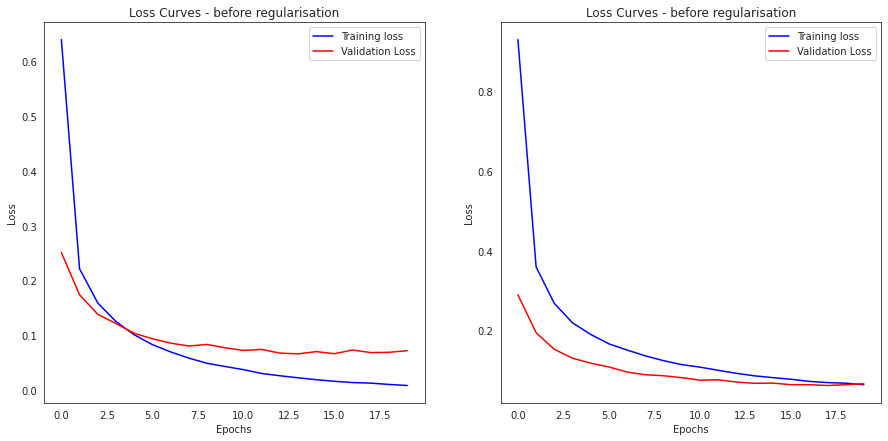

In [28]:
plt.subplots_adjust(hspace=1)
plt.figure(figsize=(15,7))
# fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplot(1, 2, 1)
plot_loss_curves(history)
plt.subplot(1, 2, 2)
plot_loss_curves(regl_history)
# plt.tight_layout()

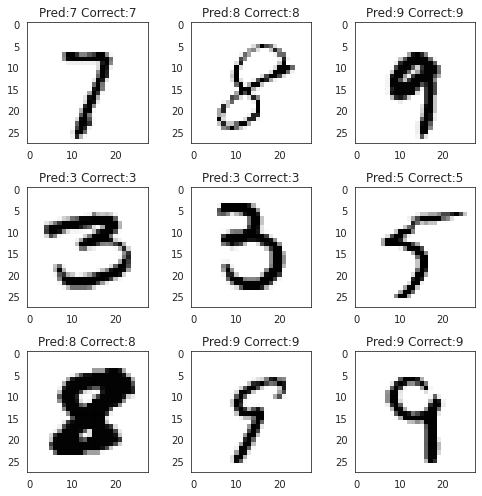

In [29]:
test_random_predictions()